In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# dtype 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
# 불필요한 columns 삭제
df = df.drop(columns=['region'])

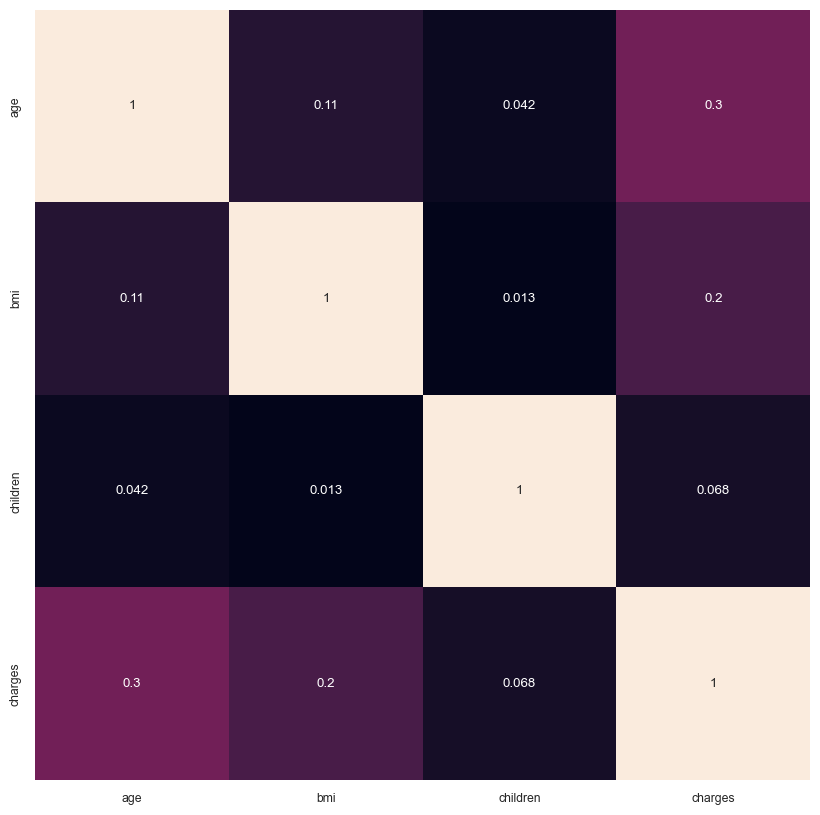

In [47]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})  # M, F, I를 숫자로 변환

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# X, Y 나누기
X = df.drop(columns=['charges']).values  # 독립변수
y = df['charges'].values  # 종속변수 (타겟)

In [71]:
#원-핫 인코딩
Y = pd.get_dummies(y).values

In [73]:
# normalization (accuracy 향상을 위해 정규화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [75]:
 #데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 3), (268, 3), (1070,), (268,))

In [103]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(3,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\piak6\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 8)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,263 (4.93 KB)

 Trainable params: 1,263 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=17,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 320764512.0000 - mse: 320764512.0000 - val_loss: 323343616.0000 - val_mse: 323343616.0000
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 323581760.0000 - mse: 323581760.0000 - val_loss: 323088320.0000 - val_mse: 323088320.0000
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 342472096.0000 - mse: 342472096.0000 - val_loss: 322494272.0000 - val_mse: 322494272.0000
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 317615456.0000 - mse: 317615456.0000 - val_loss: 321326944.0000 - val_mse: 321326944.0000
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 314708000.0000 - mse: 314708000.0000 - val_loss: 319297760.0000 - val_mse: 319297760.0000
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 313328128.0000 - mse: 313328128.0000 - val_loss: 316139488.0000 - val_mse: 316139488.0000
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 340478304.0000 - mse: 340478304.0000 - val_loss: 31

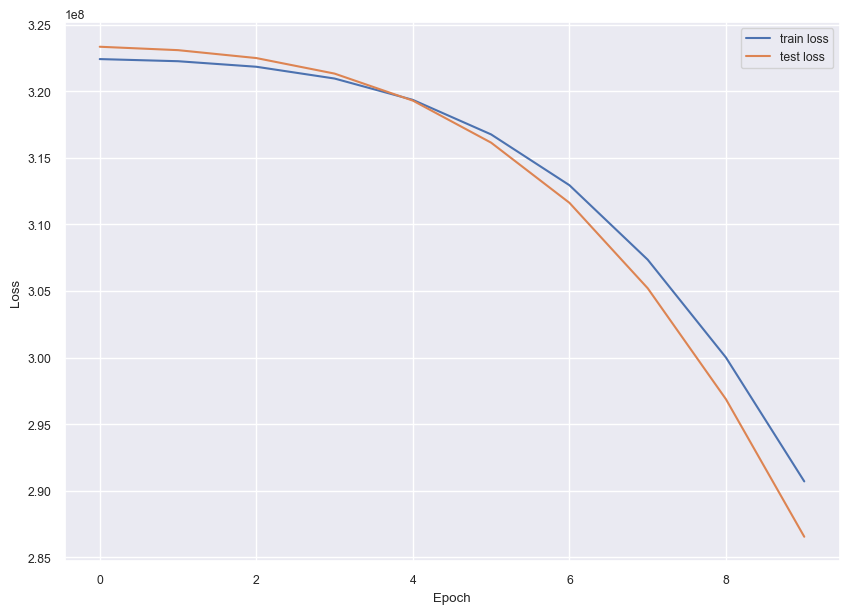

In [109]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

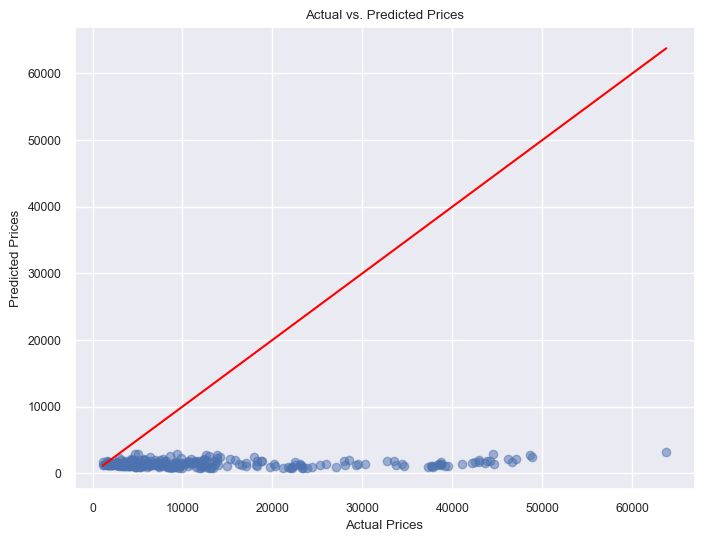

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="-")  # 대각선 (완벽한 예측)
plt.show()

In [113]:
#성능 지표 출력

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")  # 1에 가까울수록 좋음

MSE: 286544281.84
MAE: 11525.66
R² Score: -0.85
